In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160703)
tf.set_random_seed(20160703)

In [0]:
num_filters = 16

x = tf.placeholder(tf.float32, [None,784])
x_image = tf.reshape(x,[-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,num_filters],
                                         stddev=0.1))
# 절댓값을 취하지 않는다. 픽셀의 농도의 의미는 사라지지만
# 이미지의 특징을 추출한 데이터로써는 의미가 있다.
h_conv = tf.nn.conv2d(x_image, W_conv,
                      strides=[1,1,1,1],padding='SAME')

h_pool = tf.nn.max_pool(h_conv, ksize=[1,2,2,1],
                        strides=[1,2,2,1], padding='SAME')

In [0]:
# 풀링계층의 출력을 전결합층에 입력후 소프트맥수 함수를 이용하여 
# 확률로 변환

# 그레이 채널의 이미지를 2*2픽셀로 한번 풀링하였으므로
# 14*14 이미지가 되고,, 필터의 개수만큼 노드가 나온다
h_pool_flat = tf.reshape(h_pool,[-1,14*14*num_filters] )

# 합성곱필터와 풀링계층을 거친후 나온 출력수
num_units1=14*14*num_filters
num_units2=1024

w2 = tf.Variable(tf.truncated_normal([num_units1,num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool_flat, w2)+b2)

w0=tf.Variable(tf.zeros([num_units2, 10]))
b0=tf.Variable(tf.zeros([10]))
p=tf.nn.softmax(tf.matmul(hidden2, w0)+b0)

In [0]:
t=tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step=tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver=tf.train.Saver()

In [0]:
mnist=input_data.read_data_sets("/tmp/data/", one_hot = True)

In [14]:

i=0
for _ in range(4000):
  i+=1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})

  if i%100==0:
    loss_val, acc_val = sess.run([loss, accuracy],
                                 feed_dict={x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))
    saver.save(sess, 'mdc_session', global_step=i)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [15]:
!ls mdc_session*

mdc_session-3600.data-00000-of-00001  mdc_session-3800.meta
mdc_session-3600.index		      mdc_session-3900.data-00000-of-00001
mdc_session-3600.meta		      mdc_session-3900.index
mdc_session-3700.data-00000-of-00001  mdc_session-3900.meta
mdc_session-3700.index		      mdc_session-4000.data-00000-of-00001
mdc_session-3700.meta		      mdc_session-4000.index
mdc_session-3800.data-00000-of-00001  mdc_session-4000.meta
mdc_session-3800.index


In [16]:
# 최적화 처리를 모두 마친 세션을 복원
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver=tf.train.Saver()
saver.restore(sess,'mdc_session-4000')

INFO:tensorflow:Restoring parameters from mdc_session-4000


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
filter_vals, conv_vals, pool_vals = sess.run(
    [W_conv, h_conv, h_pool],
    feed_dict={x:mnist.test.images[:9]}
)

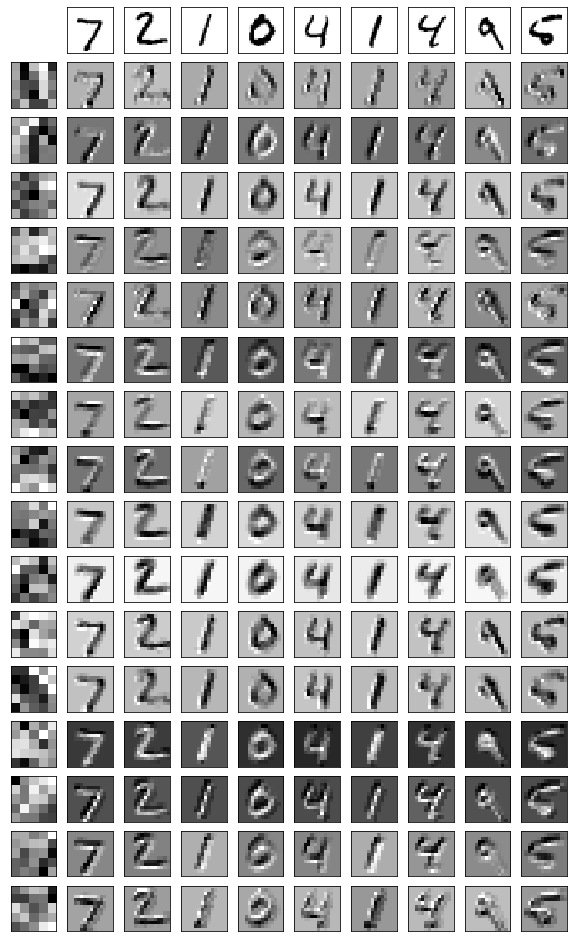

In [27]:
fig = plt.figure(figsize=(10,num_filters+1))

for i in range(num_filters):
  # 필터 출력
  subplot=fig.add_subplot(num_filters+1,10,10*(i+1)+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(filter_vals[:,:,0,i],
                 cmap=plt.cm.gray_r, interpolation='nearest')
  
for i in range(9):
  subplot=fig.add_subplot(num_filters+1, 10, i+2)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.imshow(mnist.test.images[i].reshape((28,28)),
                 vmin=0, vmax=1,
                 cmap=plt.cm.gray_r, interpolation='nearest')
  
  for f in range(num_filters):
    subplot=fig.add_subplot(num_filters+1, 10, 10*(f+1)+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest')
    subplot.imshow(pool_vals[i,:,:,f],
                   cmap=plt.cm.gray_r, interpolation='nearest')
